Modelo de epidemia que utiliza la analogia de un incendio forestal que se enfoca en un distribucion espacial estática de los organismos y su inﬂuencia en la propagación de una enfermedad infecciosa con un solo evento epidemico.

Tomamos un area geografica en forma de cuadrado, representada como el reticulo de nuestro AC, en donde los arboles se distribuyen con una probabilidad dada *p*.

Se empieza el fuego quemando un arbol para analizar de que forma se destruye el bosque. Un arbol va a incendierse si al menos alguno de sus vecinos (vecindad de Von Newman) se esta quemando y un arbol se carbonizara si completa un paso de tiempo quemandose.

In [ ]:
EMPTY = 0        # terreno vacio
TREE = 1         # árbol sano
FIRE = 2         # árbol en llamas
CHARRED = 3      # árbol quemado

In [ ]:
import numpy as np

def initialize_grid(size, tree_prob=0.1):
  grid = np.zeros((size, size), dtype=int)  # terreno vacio
  # Colocamos algunos árboles al azar
  tree_mask = np.random.rand(size,size) < tree_prob
  grid[tree_mask] = TREE
  grid[np.random.randint(0,size)][np.random.randint(0,size)] = FIRE
  return grid

In [ ]:
def update(grid):
  new_grid = grid.copy()
  size = grid.shape[0]
  for i in range(size):
    for j in range(size):
      if grid[i, j] == TREE:
        # revisar vecinos
        neighbors_on_fire = False
        for dx in [-1, 0, 1]:
          for dy in [-1, 0, 1]:
            ni, nj = i + dx, j + dy
            if 0 <= ni < size and 0 <= nj < size:
              if (dx != 0 or dy != 0) and grid[ni, nj] == FIRE:
                  new_grid[i, j] = FIRE
      elif grid[i, j] == FIRE:
        new_grid[i, j] = CHARRED
  return new_grid


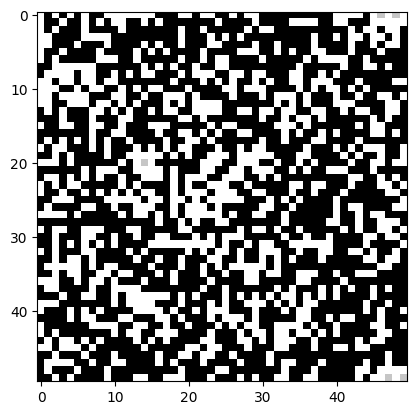

In [ ]:
import matplotlib.pyplot as plt

def animate_fire(size=50, steps=100):
  grid = initialize_grid(size, 0.6)
  fig, ax = plt.subplots()

  for step in range(steps):
    grid = update(grid)

  ax.imshow(grid, cmap='Greys', vmin=0, vmax=3)


animate_fire()
